## 调用第三方库

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']    # 用于显示所有中文
import re    # re库用于设置正则表达式
import warnings    #用于设置忽略警告
warnings.filterwarnings("ignore")

## 从计算机本地读入数据

In [12]:
df_bra = pd.read_csv('D:/mjk-git/bra/bra.csv')
df_color = pd.read_csv('D:/mjk-git/bra/colors.csv',index_col = 0)

## 对两数据进行合并处理，再提取出有用的信息

In [13]:
df_merge = pd.merge(df_bra, df_color, left_on = 'productColor', right_on = '0')
df_merge = df_merge.dropna()
df_merge = df_merge.reset_index(drop = True)
df_merge.rename(columns = {'1': 'color'}, inplace = True)
df_merge = df_merge[['creationTime','color','productSize']]
df_merge

,creationTime,color,productSize
0,2016-06-08 17:17:00,棕色,75C
1,2017-04-07 19:34:25,棕色,80B
2,2017-08-03 20:39:18,棕色,80B
3,2016-07-06 14:02:08,棕色,75B
4,2017-03-18 11:49:55,棕色,80B
...,...,...,...
15491,2017-11-03 16:39:13,粉色,34A/75A
15492,2017-11-07 23:03:10,粉色,34B/75B
15493,2017-11-14 17:25:37,粉色,34A/75A
15494,2017-11-11 00:13:32,粉色,36C/80C


## 设置正则表达式

In [14]:
re_str_one = re.compile(r'[7-9]\d[a-z]',re.I)
re_str_two = re.compile(r'[a-z][7-9]\d',re.I)
re_str_three = re.compile(r'[7-9]\d/\d{2}[a-z]',re.I)

## 对productSize进行清洗

In [15]:
for i in range(len(df_merge)):
    try:
        re_data_one = re_str_one.findall(df_merge['productSize'][i])
        re_data_two = re_str_two.findall(df_merge['productSize'][i])
        re_data_three = re_str_three.findall(df_merge['productSize'][i])
        if re_data_one:
            df_merge['productSize'][i] = re_data_one[0][0:2] + re_data_one[0][-1].upper()
        if re_data_two:
            df_merge['productSize'][i] = re_data_two[0][1:] + re_data_two[0][0].upper()
        if re_data_three:
            df_merge['productSize'][i] = re_data_three[0][0:2] + re_data_three[0][-1].upper()
        else:
            continue
    except:
        continue
df_merge

,creationTime,color,productSize
0,2016-06-08 17:17:00,棕色,75C
1,2017-04-07 19:34:25,棕色,80B
2,2017-08-03 20:39:18,棕色,80B
3,2016-07-06 14:02:08,棕色,75B
4,2017-03-18 11:49:55,棕色,80B
...,...,...,...
15491,2017-11-03 16:39:13,粉色,75A
15492,2017-11-07 23:03:10,粉色,75B
15493,2017-11-14 17:25:37,粉色,75A
15494,2017-11-11 00:13:32,粉色,80C


## 对多余的数据进行删除处理

In [16]:
a = df_merge[(df_merge['productSize']=='165/76/L')|(df_merge['productSize']=='160/70/M')|(df_merge['productSize']=='170/82/XL')].index.tolist()
for i in a:
    df_merge.drop(i, axis = 0, inplace = True)

## 统计不同颜色与尺码的频数

In [17]:
df_merge_count_color = df_merge['color'].value_counts(ascending = True)
df_merge_count_Size = df_merge['productSize'].value_counts(ascending = True)
df_merge_count_Size

95E       1
90E       3
95D       4
95C       4
90A       4
75E       5
80E       8
85E      17
80D      18
85D      20
90B      20
90D      21
70C      27
90C      39
85A     100
70A     171
85C     259
80A     270
75C     357
75D     360
70B     459
75A     488
80C     581
85B     998
80B    3968
75B    6954
Name: productSize, dtype: int64

## 对统计得到的数据进行可视化处理

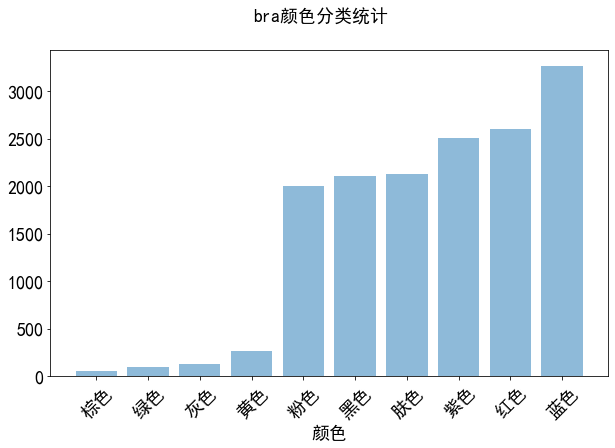

In [8]:
matplotlib.rcParams['figure.figsize'] = 10, 6    # 设置画布大小
x_color_label = df_merge_count_color.keys()    # 横坐标
y_color_value = df_merge_count_color.values    # 纵坐标
plt.bar(x_color_label, y_color_value, align = 'center', alpha = 0.5)    # 设置直方图参数
plt.suptitle('bra颜色分类统计', fontsize = 18)
plt.xticks(fontsize = 18, rotation = 45)
plt.yticks(fontsize = 18)
plt.xlabel('颜色', fontsize = 18)
plt.show()

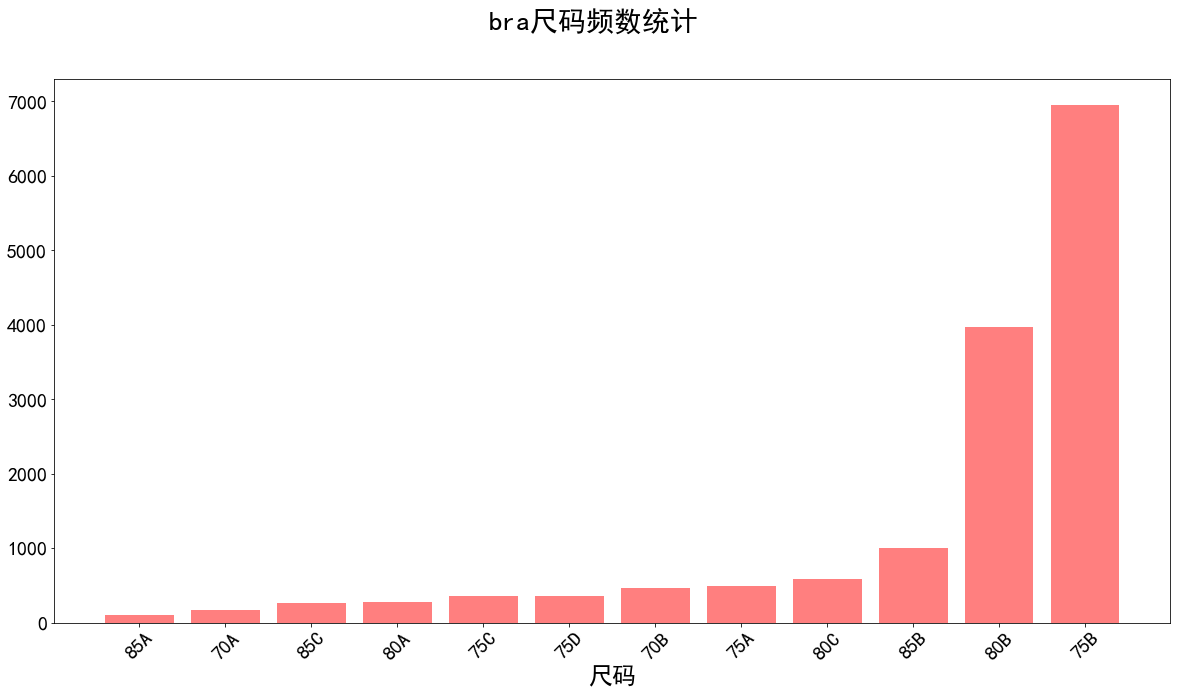

In [11]:
matplotlib.rcParams['figure.figsize'] =20, 10    # 设置画布大小
x_size_label = df_merge_count_Size.keys()    # 横坐标
y_size_label = df_merge_count_Size.values    # 纵坐标
plt.bar(x_size_label[-12:], y_size_label[-12:], align = 'center', alpha = 0.5, color = 'red')
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20)
plt.xlabel('尺码', fontsize = 24)
plt.suptitle('bra尺码频数统计', fontsize = 28)
plt.show()